In [1]:
'''
assume GENERAL exponential utility \sum u_j+u(\sum beta_j x_j)
and Gaussian distribution, here is a simplfied neural network to learn the overall risk and fair measure transformation
based on primal and dual problem
** no explicit solution
'''

import numpy as np
import matplotlib.pyplot as plt
from scipy import random
from scipy.stats import multivariate_normal
import pandas as df
import random
import matplotlib.pyplot as plt
import time

np.random.seed(1)
random.seed(1)

# Define a class Gaussian Distribution to Generate the Gaussion Distribution in N-dimensions
class GaussianND:
    # initialize the class
    def __init__(self,n_samples,n_institutions,means,covariance):
        '''
        Input:  n_institutions: number N
              means: list 1 x N
              covariance: 2D array: N x N
        Output: Generate function: n_samples x N 
        '''
        # Initialize the parameters
        self.n_samples = n_samples
        self.N = n_institutions
        self.means = means
        self.covariance = covariance
        # Get the eigen value and eigen vectors, to help generate N-dimensional data
        self.eigen_values, self.eigen_vectors = np.linalg.eig(self.covariance)
    def generate(self):
        component = []
        for i in range(self.n_samples):
            z = np.random.normal(0,1,self.N)
            x = self.means
            #print(x,"\n",self.covariance,"\n",self.eigen_values, "\n",self.eigen_vectors)
            for j in range(self.N):
              x += np.sqrt(self.eigen_values[j])*z[j]*self.eigen_vectors[j]
            component.append(x)
        return component

def generate_sample(n_samples,n_institutions,means,covariance):
    '''
    return np.array: n_samples x n_institutions
    '''
    sample = GaussianND(n_samples,n_institutions,means,covariance).generate()
    #print(sample[0:3])
    #data = df.DataFrame(np.array(sample))#columns= ['Inst 1','Inst 2','Inst 3']
    return np.array(sample)

#generate a random positive semi-definite N*N integer matrix as integer covariace matrix, in [0,m]
def generate_covint(N,m):
    A = np.random.rand(N,N)*m
    D = np.dot(A,A.transpose())
    return D
#convert covariance to correlation matrix and sigma vector: cor = diag^{-1}*cov*diag^{-1}
def func_correlation(cov, N):
    diag = np.zeros((N,N))      #diagonal matrix
    sig = []
    for i in range(N):
        diag[i][i] = cov[i][i]
        sig.append(np.sqrt(cov[i][i]))
    inv_diag_sqrt = np.linalg.inv(np.sqrt(diag))
    #print("covariance\n", cov,"\ndiagnal matrix\n",diag,"\ninverse diag suare root(sigma)\n", inv_diag_sqrt)
    return (np.dot(np.dot(inv_diag_sqrt,cov),inv_diag_sqrt)), sig


# number of sample 
number_of_sample = 50000#50000
number_of_test = 10000#50000
n_institutions = 10

'''n_institutions = 10
def create_cov_mat(rho,sig):
  cor = np.zeros((n_institutions,n_institutions))+rho
  cor[np.diag_indices_from(cor)] = 1
  covariance = np.dot(np.dot(np.diag(sig),cor),np.diag(sig))
  if np.all(np.linalg.eigvals(covariance) > 0) and not np.iscomplex(np.linalg.eigvals(covariance)).any():
    return cor,covariance
  else:
    return False

means = [1] * n_institutions#[random.random()*3+0.1]*n_institutions #*5+.1
sig = [0.8]*n_institutions #random.uniform(0.1,1)
rho = random.random()*0.25+0.4
while not isinstance(create_cov_mat(rho,sig), tuple):
  rho = random.random()*0.25+0.4
cor_mat,covariance = create_cov_mat(rho, sig)

#covariance = np.dot(np.dot(np.diag(sig),cor_mat),np.diag(sig))
print("Correlation:\n",cor_mat,"\n and Standard deviation: ",sig )'''


means = [0]*n_institutions#sorted([(random.random()*3+0.1) for i in range(n_institutions)]) #
means = sorted([(random.random()*3+0.1) for i in range(n_institutions)]) #[5]*n_institutions


### control sigma < mean
covariance = generate_covint(n_institutions,1)
cor_mat = func_correlation(covariance, n_institutions)[0]
#sig = [random.uniform(0,min(means[i],10)) for i in range(n_institutions)]
sig = [random.uniform(0,1) for i in range(n_institutions)]
covariance = np.dot(np.dot(np.diag(sig),cor_mat),np.diag(sig))
print("Correlation:\n",cor_mat,"\n and Standard deviation: ",sig )
###


train_data = generate_sample(number_of_sample,n_institutions,means,covariance)
##val_data = generate_sample(number_of_val,n_institutions,means,covariance)
test_data = generate_sample(number_of_test,n_institutions,means,covariance)

Correlation:
 [[1.         0.76879721 0.79797391 0.63977286 0.76842207 0.84360741
  0.72712452 0.7690699  0.79973971 0.79321111]
 [0.76879721 1.         0.76460382 0.7065317  0.88868415 0.60437623
  0.73136608 0.71166309 0.82694093 0.81677252]
 [0.79797391 0.76460382 1.         0.68318876 0.73039232 0.71925062
  0.60672877 0.68101638 0.77336207 0.72565569]
 [0.63977286 0.7065317  0.68318876 1.         0.63893002 0.74890436
  0.7769598  0.6763403  0.79445986 0.89226057]
 [0.76842207 0.88868415 0.73039232 0.63893002 1.         0.64305234
  0.69972851 0.84298003 0.79555034 0.78864991]
 [0.84360741 0.60437623 0.71925062 0.74890436 0.64305234 1.
  0.81246161 0.76113303 0.6808991  0.84599023]
 [0.72712452 0.73136608 0.60672877 0.7769598  0.69972851 0.81246161
  1.         0.77072239 0.86664351 0.75449805]
 [0.7690699  0.71166309 0.68101638 0.6763403  0.84298003 0.76113303
  0.77072239 1.         0.76497694 0.70674911]
 [0.79973971 0.82694093 0.77336207 0.79445986 0.79555034 0.6808991
  0.866

In [2]:
means

[0.18504242956601893,
 0.38157876032270466,
 0.5030927323372036,
 0.8652070772182651,
 1.4484731943662146,
 1.586305261275823,
 2.0547789181682887,
 2.391323856929842,
 2.4661700534065396,
 2.642301210811698]

In [3]:
import torch
#import torchvision
#import torchvision.transforms as transforms
#import matplotlib.pyplot as plt
#import random
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

## Training on GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

'''if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')
'''

batch_size=1000
## Tensor Initialization
data_=torch.from_numpy(train_data).to(device)
dataset = torch.utils.data.TensorDataset(data_)
trainloader = torch.utils.data.DataLoader(dataset,batch_size, shuffle = False)
# validation data
##validation_data=torch.from_numpy(val_data).to(device)
# testing data
testdata=torch.from_numpy(test_data).to(device)
dataset = torch.utils.data.TensorDataset(testdata)
testloader = torch.utils.data.DataLoader(dataset,batch_size, shuffle = False)

In [4]:
device

device(type='cuda', index=0)

# Dual first

In [5]:

# NN: Generator, return -alpha_B
class Generator(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        '''
        input_dim: number of uniform rvs, i.e. n_institutions 
        hidden_dim: list of hidden layer dimensions
        output_dim: number of classes i.e. n_institutions 
        '''
        super(Generator, self).__init__()
        model = [nn.Linear(input_dim, hidden_dim[0])]
        for i in range(len(hidden_dim)-1):
          model.append(nn.Linear(hidden_dim[i], hidden_dim[i+1]))
        model.append(nn.Linear(hidden_dim[-1], output_dim))
        self.model = nn.ModuleList(model)   
        

    def forward(self, x):
        '''
        Use ReLU nonlinearities in the layers, and nothing at the output.
        '''
        for i in range(len(self.model)-1):
          x = torch.relu(self.model[i](x))
        #x=torch.sigmoid(self.model[-1](x))
        #x=F.elu(self.model[-1](x))
        x=self.model[-1](x)
        return x

class Alpha_Loss(nn.Module):
    def __init__(self,utility,u_parameters,u_beta,p, B, lam):
        """
        input:
            dQ_dP: current tranformation, siz M x 1
            utility function: 'exp','...'
            parameter for utitlity function: list of u_paramaters
        """
        super(Alpha_Loss, self).__init__()
        self.u = utility
        self.u_parameters = torch.tensor(u_parameters,device = 'cuda:0')
        self.u_beta = torch.tensor(u_beta,device = 'cuda:0')
        self.p = torch.tensor(p,device = 'cuda:0')
        self.B, self.lam = B, lam
        
    def calculate_u(self, z):
        '''
        input:
          z - tensor(batch, N)
        return:
          tensor(batch), utilitiess of Z across N
        '''
        #if self.u == 'exp':
        #  return torch.sum(-torch.exp(-z*self.u_parameters)/self.u_parameters, dim=1)
        if self.u == 'exp_pairsum':
          print(torch.sum(torch.exp(-z*self.u_parameters), dim=1))
          return n_institutions**2/2-torch.square(torch.sum(torch.exp(-z*self.u_parameters), dim=1))/2
        if self.u == 'expsum_and_extra':
          x = torch.sum(z*self.u_beta, dim=1)

          '''extra = x.clone()
          extra[x<0] = 1-torch.pow(torch.abs(x[x<0]-1),self.p)
          extra[x>0] = self.p*x[x>0]/(x[x>0]+1)
          extra[x==0] = self.p*x[x==0]/(x[x==0]+1)'''
          '''if x < 0 :
            extra = 1-torch.pow(torch.abs(x-1),self.p)
          else:
            extra = self.p*x/(x+1)'''
          extra = 1-torch.exp(-self.p*x)
          #print('x',x,'extra',extra, 'whole u\n',torch.sum(1-torch.exp(-z*self.u_parameters), dim=1))
          return torch.sum(1-torch.exp(-z*self.u_parameters), dim=1)+extra#torch.sum(-torch.exp(-z*self.u_parameters)/self.u_parameters, dim=1)+extra
        
    def forward(self, dQ_dP, Z):
        """
        input:
            Z -- inputs: M x N
        return: value of loss function
        """
        # control lost
        sum_trans_Z = torch.reshape(torch.sum(Z, 1),(-1,1))*dQ_dP
        sum_u = self.calculate_u(Z)
        
        self.term1 = self.B - torch.mean(sum_u)
        self.term2 = torch.mean(sum_trans_Z)
        return torch.mean(sum_trans_Z)  + self.lam*torch.relu(self.B - torch.mean(sum_u))
    def print_loss(self):
        print("B-E U",self.term1.item())
        print("-alpha",self.term2.item())


In [6]:
# Neural Networks: approximate rho
class Net(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        '''
        uniform tranformation for X_i, thus input 1-d and output 1-d
          input_dim: N
          hidden_dim: list of hidden layer dimensions
          output_dim: 1
        '''
        super(Net, self).__init__()
        # an affine operation: y = Wx + b
        model = [nn.Linear(input_dim, hidden_dim[0])]
        for i in range(len(hidden_dim)-1):
          model.append(nn.Linear(hidden_dim[i], hidden_dim[i+1]))
        model.append(nn.Linear(hidden_dim[-1], output_dim))
        self.model = nn.ModuleList(model)   
        

    def forward(self, x):
        '''
        Use ReLU nonlinearities in the layers, and relu at the output.
        '''
        for i in range(len(self.model)-1):
          x = torch.relu(self.model[i](x))
        #x=torch.sigmoid(self.model[-1](x))
        #x=F.elu(self.model[-1](x))
        #x=self.model[-1](x)
        x = torch.log(1 + torch.exp(self.model[-1](x)))# torch.relu(self.model[-1](x))+0.01
        return x/torch.mean(x)

class Loss(nn.Module):
    def __init__(self, u_paramaters, B):
        super(Loss, self).__init__()
        self.alphas = torch.tensor(u_paramaters).to(device)
        self.B = B
        self.beta = self.calculate_par()

    def calculate_par(self):
        beta = 0
        for alpha in self.alphas:
          beta += 1/alpha
        return beta
        
    def forward(self,data,dQ_dP,loss_alpha):
        """
        input:
            dQ_dP -- inputs: M x 1, generated from X by NN
            loss_alpha -- minimized 1 x 1 tensor under current dQ_dP, i.e. -alpha
        return: value of loss function
        """
        # control lost
        sum_X = torch.reshape(torch.sum(data, 1),(-1,1))
        
        return torch.mean(sum_X*dQ_dP, 0)  - loss_alpha

In [7]:
#u_parameters = sorted([random.uniform(0.8, 2) for i in range(n_institutions)]) #[1,2,3]

u_parameters  = [1.1122798436470818,
  1.2,
 1.3600655431719748,
 1.8948894071014162,
 1.942496453417903,
 2.0424170726028246,
 2.26928838290612,
 2.3344025824476655,
 2.6278998816486365,
 2.9867918993531175]

a =[round(num,3) for num in u_parameters]


In [ ]:
utility, B, lam_alpha  = 'expsum_and_extra',-1,1
u_beta_ = np.random.uniform(0,1,n_institutions)
u_beta = [round(betas,3) for betas in u_beta_]

In [ ]:
u_beta

[0.652, 0.964, 0.039, 0.715, 0.771, 0.147, 0.965, 0.604, 0.809, 0.886]

In [ ]:
p = 2

input_dim= n_institutions     # how many Variables are in the dataset
hidden_dim = [64,64]#[64,32]          # hidden layer dimensions
#output_dim= n_institutions   # number of classes


## Instantiating the transformer
net = Net(input_dim,hidden_dim ,1).to(device)
criterion = Loss(u_parameters,B)
learning_rate = 0.001#0.001
optimizer = optim.SGD(net.parameters(), lr=learning_rate,weight_decay=0.0001)

generator = Generator(n_institutions,[64,64],n_institutions).to(device)
gen_criterion = Alpha_Loss(utility,u_parameters,u_beta,p, B, lam_alpha)
gen_optimizer = optim.SGD(generator.parameters(), lr=0.001, weight_decay=0.0001)#0.0005


In [ ]:
device

device(type='cuda', index=0)

In [ ]:
## 3. Training the neural network model
num_epochs = 1000#4000#2000

l_set = []
for j in range(1):
  print("Net {}".format(j+1))
  error_rate_paths=[[],[]]
  start_time = time.time()
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      if (epoch+1) % 200 == 0 and epoch+1<1600:#num_epochs:
        optimizer.param_groups[0]['lr'] /= 2
        gen_optimizer.param_groups[0]['lr'] /= 2
        #gen_criterion.lam *=2

        

      print_bool = False
      if (epoch+1) % 50 ==0: 
        print_bool = True
        print("Epoch {}/{}".format(epoch+1,num_epochs))

      running_loss = 0.0
      dQ_dP = torch.tensor([])
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [N-dim inputs]
          input = data[0]
          # zero the parameter gradients, before each instance
          optimizer.zero_grad()
          # forward + backward + optimize
          output = net(input.float())   #dQ/dP , 500 x 1

          gen_optimizer.zero_grad()
          Z = generator(input.float())
          loss_alpha = gen_criterion(output,Z)

          loss = criterion(input,output,loss_alpha)
          loss.backward()

          for par in generator.parameters():
            par.grad *= -1
          gen_optimizer.step()
          optimizer.step()    # Does the update
          

          # print statistics
          running_loss += loss.item()
        
      l_set.append(running_loss / (i+1))
      if print_bool:
        gen_criterion.print_loss()
        ##print('loss function of alpha:',loss_alpha)
        print("Learn -rho, Training Loss: {:.3f}".format(running_loss / (i+1)))
        
  end_time = time.time()
  gen_criterion.print_loss()
  print('Finished Training for Net ',j+1)
  print(f"training time is {(end_time-start_time)/60:.2f} minutes")
 

Net 1
Epoch 50/1000
B-E U -0.13011630732300672
-alpha -1.127086877822876
Learn -rho, Training Loss: 14.589
Epoch 100/1000
B-E U -0.29920123781889196
-alpha -1.252266764640808
Learn -rho, Training Loss: 14.596
Epoch 150/1000
B-E U -0.11421892738127715
-alpha -1.3076509237289429
Learn -rho, Training Loss: 14.663
Epoch 200/1000
B-E U 0.14933656536737994
-alpha -1.3657939434051514
Learn -rho, Training Loss: 14.761
Epoch 250/1000
B-E U -0.2360914172962818
-alpha -1.190708875656128
Learn -rho, Training Loss: 14.758
Epoch 300/1000
B-E U -0.2706601345886468
-alpha -1.1463969945907593
Learn -rho, Training Loss: 14.752
Epoch 350/1000
B-E U 0.14483290334481436
-alpha -1.2651150226593018
Learn -rho, Training Loss: 14.768
Epoch 400/1000
B-E U -0.027917985176767135
-alpha -1.2084382772445679
Learn -rho, Training Loss: 14.768
Epoch 450/1000
B-E U -0.12178335167558152
-alpha -1.1766411066055298
Learn -rho, Training Loss: 14.778
Epoch 500/1000
B-E U -0.009320685320830191
-alpha -1.204328179359436
Learn

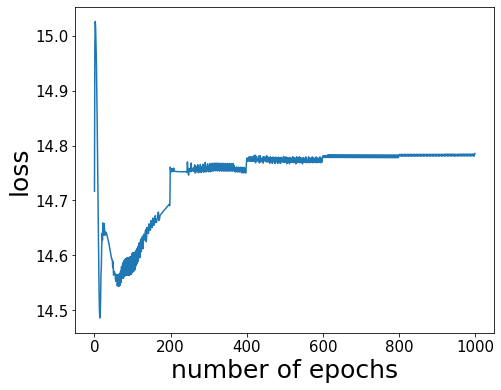

In [ ]:
plt.plot(np.arange(num_epochs),l_set)# s = 0.1
#plt.ylim((52,53))
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.show() 

In [ ]:

# Numerial: check accuracy of predicted fair individual allocation, with test data

output = torch.tensor([]).to(device)
l_alpha = 0.0
l = 0.0
for i, data in enumerate(testloader, 0):
  testinput = data[0]
  testoutput = net(testinput.float())  
  testZ = generator(testinput.float())
  loss_alpha = gen_criterion(testoutput,testZ)
  loss = criterion(testinput,testoutput,loss_alpha)
  l_alpha += loss_alpha.item()
  print(i,loss_alpha.item())
  l += loss.item()
  output = torch.cat([output,testoutput])
gen_criterion.print_loss()
print("Testing loss: {:.3f}".format(l / (i+1)))

0 -1.1440781354904175
1 -1.0864986181259155
2 -1.147333025932312
3 -1.143091082572937
4 -1.1587377786636353
5 -1.118287444114685
6 -1.090789794921875
7 -1.0087369680404663
8 -1.078759789466858
9 -1.2146130771819315
B-E U 0.019224884968642275
-alpha -1.2338379621505737
Testing loss: 14.794


In [ ]:
# alpha =beta/2 * E[dQ_dP * ln(dQ_dP)]+gamma-beta/2*log(beta**2/(N^2-2B))
print('Estimated alpha: see above or', -l_alpha/(i+1))

Estimated alpha: see above or 1.1190925714511033


Metric to evaluate $dQ/dP$

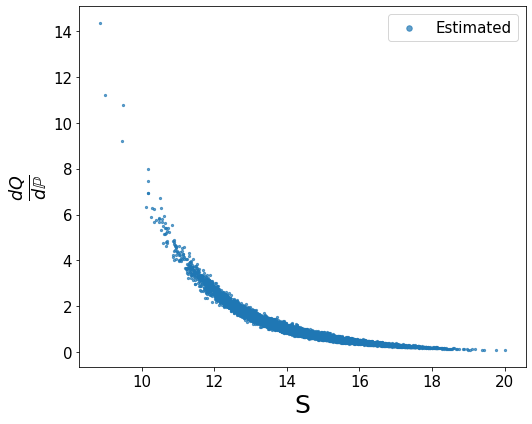

In [ ]:
#===================================================#
# figure setup fonts and so on... 
# the label and font size should be adjusted such that 
# the figure fits well into ACM template
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=22) 
plt.rc('axes', labelsize=25)
plt.rcParams["figure.figsize"] = (7.5, 6)
#===================================================#

## Graph fitting
fig = plt.figure()
plt.scatter(torch.sum(testdata,1).detach().cpu().numpy(),output.detach().cpu().numpy(),s = 5,label = "Estimated", alpha = 0.7)

#plt.ylim(0,2)
plt.xlabel("S")# = \sum_{n=1}^N X^n
plt.ylabel(r"$\frac{dQ}{d\mathbb{P}}$")
#plt.legend()
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
plt.tight_layout()
fig.savefig("dQdP_vs_sumX.pdf")

In [ ]:
# take down p=1.1 result
# uncomment only for p=1.1 experiment
#output11 = output.detach().cpu().numpy()

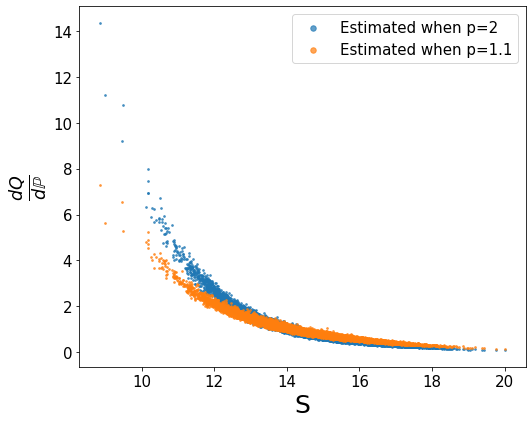

In [ ]:
#===================================================#
# recall p=1.1 result and draw with p=2
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15)
plt.rc('legend', fontsize=22) 
plt.rc('axes', labelsize=25)
plt.rcParams["figure.figsize"] = (7.5, 6)
#===================================================#

## Graph fitting
fig = plt.figure()
plt.scatter(torch.sum(testdata,1).detach().cpu().numpy(),output.detach().cpu().numpy(),s = 3,label = "Estimated when p=2", alpha = 0.7)
plt.scatter(torch.sum(testdata,1).detach().cpu().numpy(),output11,s = 3,label = "Estimated when p=1.1", alpha = 0.7)


#plt.ylim(0,2)
plt.xlabel("S")# = \sum_{n=1}^N X^n
plt.ylabel(r"$\frac{dQ}{d\mathbb{P}}$")
#plt.legend()
lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=15)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
plt.tight_layout()
fig.savefig("dQdP_vs_sumX.pdf")

# Primal and Combined with dual

**Compare $E_Q[Y^n]$**

In [ ]:
## Copy from learning for risk measures.... train NN to get Y's
# Neural Networks
class Net_Y(nn.Module):
    def __init__(self,input_dim,hidden_dim,output_dim):
        '''
        input_dim: how many variables are in the dataset, i.e. n_institutions 
        hidden_dim: list of hidden layer dimensions
        output_dim: number of classes i.e. n_institutions 
        '''
        super(Net_Y, self).__init__()
        # an affine operation: y = Wx + b
        model = [nn.Linear(input_dim, hidden_dim[0])]
        for i in range(len(hidden_dim)-1):
          model.append(nn.Linear(hidden_dim[i], hidden_dim[i+1]))
        model.append(nn.Linear(hidden_dim[-1], output_dim))
        self.model = nn.ModuleList(model)   
        

    def forward(self, x):
        '''
        Use ReLU nonlinearities in the layers, and nothing at the output.
        '''
        for i in range(len(self.model)-1):
          x = torch.relu(self.model[i](x))
        #x=torch.sigmoid(self.model[-1](x))
        #x=F.elu(self.model[-1](x))
        #x=F.leaky_relu(self.model[-1](x))
        #x=torch.exp(self.model[-1](x))
        x=self.model[-1](x)
        return x

class Loss_Y(nn.Module):
    def __init__(self, utility,u_paramaters,u_beta,p, B, lam, mu):
        """
        input:
            utility function: 'exp','...'
            parameter for utitlity function: list of u_paramaters
        """
        super(Loss_Y, self).__init__()
        self.u = utility
        self.u_parameters = torch.tensor(u_paramaters, device="cuda")
        self.u_beta = torch.tensor(u_beta, device="cuda")
        self.p = torch.tensor(p, device="cuda")
        self.B, self.lam, self.mu  = B, lam, mu
        
    def calculate_u(self, x):
        if self.u == 'expsum_and_extra':
          s = torch.sum(x*self.u_beta)
          if s < 0 :
            extra = 1-torch.pow(torch.abs(s-1),self.p)
          else:
            extra = self.p*s/(s+1)
          return torch.sum(1-torch.exp(-x*self.u_parameters), dim=1)+extra
        
    def forward(self, X, Y):
        """
        input:
            X -- inputs: M x N
            Y -- outputs: M x N
        return: value of loss function
        """
        M = X.size(dim=0)
        # control lost
        sum_Y = torch.sum(Y, 1)
        sum_u = self.calculate_u(X+Y)
        
        self.term1 = self.B - torch.mean(sum_u)
        self.term2 = torch.var(sum_Y)
        self.term3 = torch.mean(sum_Y)
        self.term4 = torch.mean(sum_u)
        
        return torch.mean(sum_Y)  + self.mu*torch.std(sum_Y) + self.lam*torch.relu(self.B - torch.mean(sum_u))#**2


    def print_loss(self):
        print("B-sum u_n",self.term1.item(),"\nU(Xn+Yn)",self.term4.item(), "\nvar(sumY)",self.term2.item(), "\nmean(sumY)", self.term3.item())

utility, B, lam, mu = 'expsum_and_extra',B, .02, 1
u_beta = [0.01]*n_institutions
p = 1.1

input_dim= n_institutions     # how many Variables are in the dataset
hidden_dim = [64,64]          # hidden layer dimensions
output_dim= n_institutions   # number of classes


## Instantiating the classifier
net_Y = Net_Y(input_dim,hidden_dim ,output_dim).to(device)
criterion_Y = Loss_Y(utility,u_parameters, u_beta,p,B, lam, mu)
learning_rate = 0.00001#0.0001
optimizer = optim.SGD(net_Y.parameters(), lr=learning_rate, weight_decay=0.0001)


In [ ]:
## 3. Training the neural network model
num_epochs = 3000#1600#3000 # 800,200? 20%

l_set = []
for j in range(1):
  print("Net {}".format(j+1))
  error_rate_paths=[[],[]]
  start_time = time.time()
  for epoch in range(num_epochs):  # loop over the dataset multiple times
      if (epoch+1) % 1000 == 0 and epoch+1<num_epochs: # 1000
        optimizer.param_groups[0]['lr'] /= 1
        
        criterion_Y.lam *= 10
        criterion_Y.mu *= 10
        

      running_loss = 0.0
      for i, data in enumerate(trainloader, 0):
          # get the inputs; data is a list of [N-dim inputs]
          input = data[0]
          # zero the parameter gradients, before each instance
          optimizer.zero_grad()
          # forward + backward + optimize
          output_tmp = net_Y(input.float())

          loss = criterion_Y(input, output_tmp)
          #print('loss',loss,'\n',criterion_Y.print_loss())
          #print(loss.item())
          loss.backward()
          optimizer.step()    # Does the update

          # print statisticsç
          running_loss += loss.item()
      l_set.append(running_loss / (i+1))
      if epoch % 50 ==0:
        print("Epoch {}/{}, Training Loss(rho): {:.3f}".format(epoch+1,num_epochs, running_loss / (i+1)))
  end_time = time.time()
  criterion_Y.print_loss()
  print('Finished Training for Net ',j+1)

print(f"training time is {(end_time-start_time)/60:.2f} minutes")

Net 1
Epoch 1/3000, Training Loss(rho): 0.432
Epoch 51/3000, Training Loss(rho): -3.314
Epoch 101/3000, Training Loss(rho): -10.888
Epoch 151/3000, Training Loss(rho): -17.104
Epoch 201/3000, Training Loss(rho): -18.940
Epoch 251/3000, Training Loss(rho): -19.152
Epoch 301/3000, Training Loss(rho): -19.267
Epoch 351/3000, Training Loss(rho): -19.372
Epoch 401/3000, Training Loss(rho): -19.474
Epoch 451/3000, Training Loss(rho): -19.577
Epoch 501/3000, Training Loss(rho): -19.682
Epoch 551/3000, Training Loss(rho): -19.789
Epoch 601/3000, Training Loss(rho): -19.899
Epoch 651/3000, Training Loss(rho): -20.011
Epoch 701/3000, Training Loss(rho): -20.124
Epoch 751/3000, Training Loss(rho): -20.236
Epoch 801/3000, Training Loss(rho): -20.345
Epoch 851/3000, Training Loss(rho): -20.450
Epoch 901/3000, Training Loss(rho): -20.549
Epoch 951/3000, Training Loss(rho): -20.639
Epoch 1001/3000, Training Loss(rho): 13.249
Epoch 1051/3000, Training Loss(rho): -12.389
Epoch 1101/3000, Training Loss(

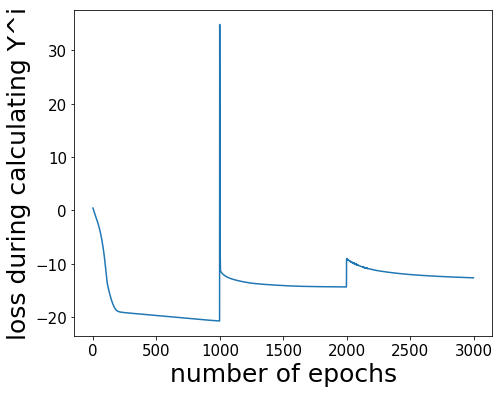

In [ ]:
plt.plot(np.arange(num_epochs),l_set)# s = 0.1
#plt.ylim((52,53))
plt.xlabel('number of epochs')
plt.ylabel('loss during calculating Y^i')
plt.show() 

In [ ]:
Y_output = net_Y(testdata.float())
EQY_output = torch.mean(Y_output*output,0)
print('NN Y.    ',np.round(torch.mean(Y_output,0).cpu().detach().numpy(), 2))
print('NN EQY.    ',np.round(EQY_output.cpu().detach().numpy(), 2))

NN Y.     [-0.68 -0.79 -0.68 -0.76 -1.12 -1.47 -1.86 -2.3  -2.37 -2.38]
NN EQY.     [-0.95 -0.79 -0.5  -0.63 -0.76 -1.73 -1.91 -2.27 -2.43 -2.4 ]


In [ ]:
torch.sum(EQY_output)

tensor(-14.3832, device='cuda:0', grad_fn=<SumBackward0>)